# Clasificadores generativos: KNN

Vamos primero con algo de psicología cognitiva. 

Una característica generalizada del aprendizaje humano es la *inferencia iductiva*, que hace referencia a la capacidad de extender el conocimiento desde instancias conocidas hacia nuevos ejemplos que no hicieron parte del proceso de aprendizaje. Algunos autores consideran incluso que la inducción es el comportamiento más importante del pensamiento, ya que "la inferencia inductiva es el único proceso a través del cual el nuevo conocimiento llega al mundo" (Fisher, 1951). 

La inducción requiere por lo menos dos estímulos o conjuntos de estímulos: el estímulo base y el estímulo objetivo y es claro que no todos los tipos de estímulo son igual de propensos a la inducción. Pro ejemplo, si los individuos A y B son leones, es claro que tienen mucho más en común que si los individuos A y B son cosas blancas, por lo tanto puede inducirse mucho más de un león a otro que de una cosa blanca a otra (Markman, 1989).

Lo anterior nos lleva a la idea de "similaridad". Cuanto más similares son dos objetos, es más posible realizar inducciones sobre ellos. 

En el reconocimiento de patrones, la medida de similaridad se plantea matemáticamente como la inversa de la medida de distancia. Cuanto menor sea la distancia entre dos objetos en un espacio de características, más similares son. Teniendo en cuenta que un espacio de características es un espacio vectorial, podemos usar las distancias inducidas por una norma, siendo la más común la distancia euclidea inducida por la norma 2:

\begin{equation}
||\boldsymbol{x}-\boldsymbol{y}||_2 = \sqrt{(x_1-y_1)^2 + (x_2 - y_2)^2 + \ldots + (x_n - y_n)^2}
\end{equation}

* Fisher, R. (1951). The design of experiments. New York: Hafner Publishing Company. (Original work published in 1935).

* Markman, E. M. (1989). Categorization and naming in children: Problems of induction.Cambridge, MA: MIT Press.


¿Cómo usamos este método de inferencia para entrenar un clasificador?

La anterior noción nos lleva a la que se conoce como la "regla del vecino más cercano". Consiste en que, a una nueva muestra se le asignará la clase correspondiente a el ejemplo que esté más cerca a él en el espacio de características. 

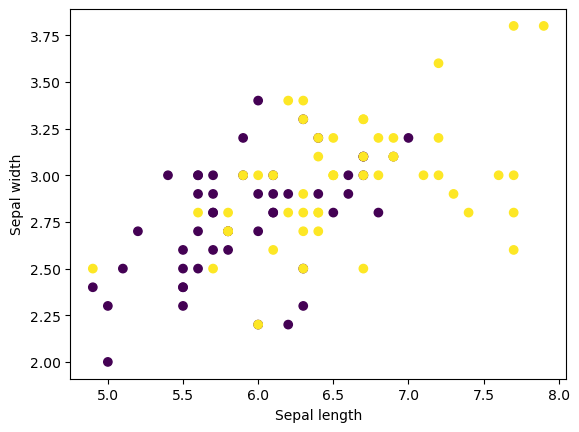

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
# Importamos la base de datos iris
iris = datasets.load_iris()
X = iris.data[50:150, :2]  # Esta vez tomamos las clases versicolor y virginica que son linealmente no separables
y = iris.target[50:150]
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

Cosideremos una muestra nueva. ¿A qué clase pertenece?

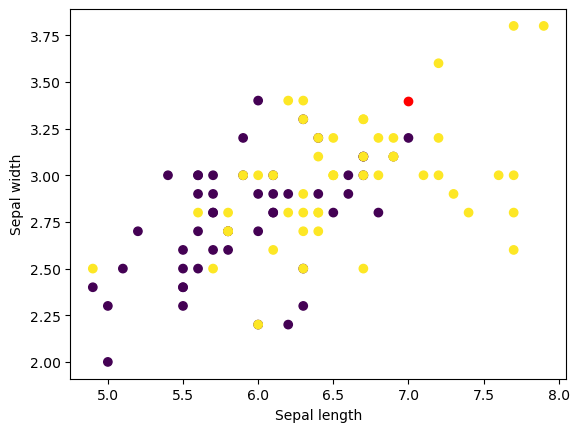

In [2]:
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.scatter(7,3.4,c='red',marker='o')
plt.show()

Vamos a calcular las distancias desde todas las muestras con clase conocida hacia la nueva muestra:

In [3]:
import numpy as np
distancia = lambda x , y: np.sqrt(sum((x-y)**2))
D=np.zeros(len(X))
for i in range(len(X)):
    D[i]=distancia(np.array([7,3.4]),X[i])
print(D)

[0.2        0.63245553 0.31622777 1.86010752 0.78102497 1.43178211
 0.70710678 2.32594067 0.64031242 1.93132079 2.44131112 1.17046999
 1.56204994 1.02956301 1.48660687 0.42426407 1.45602198 1.3892444
 1.44222051 1.6643317  1.11803399 1.08166538 1.14017543 1.08166538
 0.78102497 0.56568542 0.63245553 0.5        1.11803399 1.52643375
 1.80277564 1.80277564 1.3892444  1.22065556 1.64924225 1.
 0.42426407 1.30384048 1.45602198 1.74928557 1.7        0.98488578
 1.44222051 2.28254244 1.56524758 1.36014705 1.39283883 0.94339811
 2.1023796  1.43178211 0.70710678 1.3892444  0.41231056 0.86023253
 0.64031242 0.72111026 2.28473193 0.58309519 0.9486833  0.28284271
 0.53851648 0.92195445 0.4472136  1.58113883 1.34164079 0.63245553
 0.64031242 0.80622577 1.06301458 1.56204994 0.2236068  1.52315462
 0.92195445 0.98994949 0.31622777 0.28284271 1.         0.98488578
 0.84852814 0.4472136  0.72111026 0.98488578 0.84852814 0.92195445
 1.20415946 0.80622577 0.7        0.67082039 1.07703296 0.31622777
 0.4

Ahora buscamos cuál es la muestra más cercana y cuál es la clase a la que pertenece:

In [4]:
mas_cercano=D.argmin()
print(X[mas_cercano])

[7.  3.2]


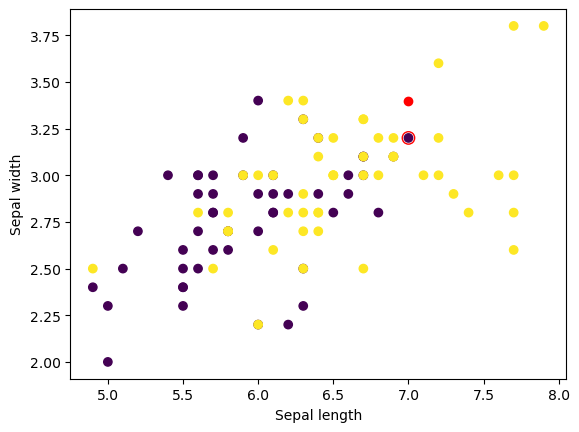

In [5]:
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.scatter(7,3.4,c='red',marker='o')
plt.scatter(X[mas_cercano,0],X[mas_cercano,1],s=80,facecolors='none',edgecolors='red')
plt.show()

Ahora, desde el punto de vista del clasificador, lo que tenemos que hacer es obtener la clase a la cual pertenece dicha muestra:

In [ ]:
print(y[mas_cercano])

Ahora introduzcamos un poco de democracia. No tomamos la decisión basándonos sólo en la muestra más cercana sino en $K$ vecinos más cercanos (K-nearest neighbours: K-NN). Estos vecinos votan entre sí para decidir a qué clase pertenece la nueva muestra. Supongamos un valor de $K=5$:

[[7.  3.2]
 [6.9 3.2]
 [6.8 3.2]
 [7.2 3.2]
 [7.2 3.6]]


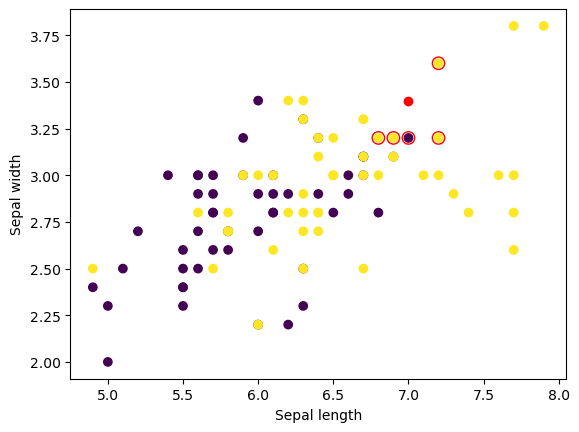

In [6]:
orden=D.argsort() #Orden de distancias de menor a mayor
V5NN = X[orden[0:5]]
print(V5NN)

plt.scatter(X[:, 0], X[:, 1],c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.scatter(7,3.4,c='red',marker='o')
plt.scatter(V5NN[:,0],V5NN[:,1],s=80,facecolors='none',edgecolors='red')
plt.show()

In [7]:
import statistics as stats
votos=y[orden[0:5]]
print(votos)
print(stats.mode(votos))

[1 2 2 2 2]
2


Ahora veamos cómos se hace en SciKit Learn:

In [8]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X, y)
test=np.array([[7,3.4]]) #Prueba
clf.predict(test)

array([2])

## Validación

¿Cómo podemos evaluar el aprendizaje?

Si la inferencia inductiva es el principal componente del aprendizaje, la evaluacion de un clasificador debe hacerse sobre muestras **que no hayan estado en el entrenamiento**, pero sobre las cuales conozcamos cuál es la salida correcta. Para esto, la base de datos debe dividirse en dos grupos: el grupo de entrenamiento y el grupo de prueba. Opciones habituales consisten en hacer particiones 70%-30%, 80%-20% o 90%-10%.

In [ ]:
muestras_train=np.random.choice(100, size=90, replace=False) #Escogemos 80 muestras aleatoriamente
Xtrain=X[muestras_train]
ytrain=y[muestras_train]
muestras_test=np.where(np.isin(range(100),muestras_train,invert=True)) #La prueba se hace con las muestras que no se usaroin en el entrenamiento
Xtest=X[muestras_test]
ytest=y[muestras_test]

clf.fit(Xtrain, ytrain)
test=Xtest 
predicciones=clf.predict(test)

print(predicciones)
print(ytest)

#¿Qué tanto se parecen a las etiquetas reales?
sum(predicciones==ytest)/len(ytest)

#¿Qué tanto varía este resultado si lo corremos varias veces?

Este tipo de validación tiene un sesgo debido a la elección aleatoria de las muestras de entrenamiento y prueba. Existen dos métodos que corrigen este sesgo: *bootstrapping* y validación cruzada. El *bootrstrapping* consiste en ejecutar el procedimiento un número elevado de repeticiones y obtener estadísticas al respecto. 

In [ ]:
P = np.zeros(100)
for i in range(100): 
    muestras_train=np.random.choice(100, size=90, replace=False) #Escogemos 80 muestras aleatoriamente
    Xtrain=X[muestras_train]
    ytrain=y[muestras_train]
    muestras_test=np.where(np.isin(range(100),muestras_train,invert=True)) #La prueba se hace con las muestras que no se usaroin en el entrenamiento
    Xtest=X[muestras_test]
    ytest=y[muestras_test]
    
    clf=KNeighborsClassifier(n_neighbors=13)
    clf.fit(Xtrain, ytrain)
    test=Xtest 
    predicciones=clf.predict(test)

    P[i]=sum(predicciones==ytest)/len(ytest)

np.mean(P)
#¿Qué tanto varía este resultado si lo corremos varias veces?

La validación cruzada divide la base de datos en *n* partes iguales llamadas *folds* y repite la validación *n* veces, dejando cada vez un *fold* diferente para la prueba y el resto para el entrenamiento.